## CASE STUDY 3 - INSURANCE CLAIMS CASE STUDY

### Import necessary libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

### Q1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360 degree view of the data. Use the same for the subsequent questions.

In [4]:
Claims_data = pd.read_csv('E:\claims.csv')
Claims_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [5]:
Cust_data = pd.read_csv('E:\cust_demographics.csv')
Cust_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [6]:
Final_data = pd.merge(left=Cust_data, right=Claims_data, left_on='CUST_ID', right_on='customer_id',how='inner')
Final_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


### Q2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [10]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   DateOfBirth          1085 non-null   datetime64[ns]
 3   State                1085 non-null   object        
 4   Contact              1085 non-null   object        
 5   Segment              1085 non-null   object        
 6   claim_id             1085 non-null   int64         
 7   customer_id          1085 non-null   int64         
 8   incident_cause       1085 non-null   object        
 9   claim_date           1085 non-null   datetime64[ns]
 10  claim_area           1085 non-null   object        
 11  police_report        1085 non-null   object        
 12  claim_type           1085 non-null   object        
 13  claim_amount         1020 non-nul

In [8]:
# Convert date of birth and claim date to datetime type
Final_data['DateOfBirth'] = pd.to_datetime(Final_data['DateOfBirth'], format='%d-%b-%y')
Final_data['claim_date'] = pd.to_datetime(Final_data['claim_date'], format='%m/%d/%Y')

In [9]:
# Convert total_policy_claims to object type
Final_data['total_policy_claims'] = Final_data.total_policy_claims.astype(object)

In [11]:
Final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,1085.0,5.076790e+07,2.849625e+07,154557.0,26450621.0,49759488.0,76093960.0,99961993.0
claim_id,1085.0,4.891553e+07,2.912818e+07,26832.0,24046062.0,48559754.0,74043997.0,99775483.0
customer_id,1085.0,5.076790e+07,2.849625e+07,154557.0,26450621.0,49759488.0,76093960.0,99961993.0


### Q3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign

In [12]:
Final_data['claim_amount'] = Final_data.claim_amount.str.replace("$","").astype(float)

In [13]:
Final_data.claim_amount.dtypes

dtype('float64')

In [14]:
Final_data.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1,Yes


### Q4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [15]:
Final_data['Alert_flag'] = np.where(Final_data.police_report == "No",0,np.where(Final_data.police_report == "Yes", 1, "None"))

In [16]:
Final_data.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert_flag
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1,No,0
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3,No,None
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1,Yes,0


### Q5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.
### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [17]:
Final_data.sort_values(by = ['claim_date'], inplace=True)
Final_data.drop_duplicates(subset = ['CUST_ID'], keep='last', inplace=True)
Final_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert_flag
177,74155265,Male,1985-11-16,TX,392-739-4873,Gold,25647821,74155265,Natural causes,2017-01-01,Auto,No,Material only,2080.0,1,No,0
181,61745840,Female,1994-07-24,MA,612-684-5472,Platinum,90591192,61745840,Other driver error,2017-01-01,Home,No,Material and injury,30930.0,1,No,0
312,65176092,Male,1975-11-23,NC,651-379-2486,Silver,9476314,65176092,Other causes,2017-01-01,Auto,No,Material and injury,37290.0,3,No,0
905,42664554,Female,1993-08-13,TN,396-973-2531,Gold,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1,No,0
120,39587790,Male,2065-01-10,LA,615-154-3516,Gold,39131766,39587790,Other causes,2017-01-01,Auto,No,Material only,2967.0,1,Yes,0


In [18]:
Final_data.shape

(1078, 17)

### Q6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [19]:
Final_data.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
Alert_flag              0
dtype: int64

In [20]:
 Final_data.total_policy_claims.mode()

0    1
dtype: object

In [21]:
# Missing value imputation for categorical value
Final_data['total_policy_claims'] = Final_data['total_policy_claims'].replace(np.nan, 1)

# Missing value imputation for continuous value
Final_data['claim_amount'] = Final_data['claim_amount'].replace(np.nan, Final_data.claim_amount.mean())

In [22]:
Final_data.isnull().sum()

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
Alert_flag             0
dtype: int64

### Q7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
### Children : < 18, Youth : 18-30, Adult : 30-60, Senior : > 60 

In [23]:
dob_year = pd.DatetimeIndex(Final_data['DateOfBirth']).year
claim_year = pd.DatetimeIndex(Final_data['claim_date']).year
x = dob_year - 100
a = claim_year - x
b = claim_year - dob_year

In [24]:
Final_data['Age'] = np.where(dob_year > claim_year, a, b)

In [25]:
Final_data.head(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert_flag,Age
177,74155265,Male,1985-11-16,TX,392-739-4873,Gold,25647821,74155265,Natural causes,2017-01-01,Auto,No,Material only,2080.0,1.0,No,0,32
181,61745840,Female,1994-07-24,MA,612-684-5472,Platinum,90591192,61745840,Other driver error,2017-01-01,Home,No,Material and injury,30930.0,1.0,No,0,23
312,65176092,Male,1975-11-23,NC,651-379-2486,Silver,9476314,65176092,Other causes,2017-01-01,Auto,No,Material and injury,37290.0,3.0,No,0,42
905,42664554,Female,1993-08-13,TN,396-973-2531,Gold,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,0,24
120,39587790,Male,2065-01-10,LA,615-154-3516,Gold,39131766,39587790,Other causes,2017-01-01,Auto,No,Material only,2967.0,1.0,Yes,0,52


In [27]:
Final_data['Age_Group'] = np.where(Final_data.Age < 18, 'Children', np.where((Final_data.Age >= 18) & (Final_data.Age < 30), 
                                'Youth', np.where((Final_data.Age >= 30) & (Final_data.Age < 60), 'Adult', 'Senior')))

In [28]:
Final_data.tail()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert_flag,Age,Age_Group
1077,65208809,Male,2064-04-22,VA,286-128-6132,Platinum,91386759,65208809,Natural causes,2018-10-30,Auto,No,Material only,2290.000000,1.0,No,0,54,Adult
238,40480522,Female,1984-05-30,NV,739-259-6835,Gold,52377605,40480522,Driver error,2018-10-30,Auto,Unknown,Material and injury,26310.000000,1.0,No,None,34,Adult
226,17682060,Female,1974-11-21,NV,186-195-3465,Gold,49735712,17682060,Crime,2018-10-30,Home,Unknown,Material and injury,17020.000000,1.0,No,None,44,Adult
322,77510822,Female,1986-03-18,AK,436-934-7156,Silver,87329176,77510822,Other driver error,2018-10-30,Auto,Unknown,Material only,12501.726555,2.0,No,None,32,Adult
1055,58451506,Male,2068-04-22,FL,673-574-7823,Gold,43042986,58451506,Natural causes,2018-10-30,Auto,No,Material only,2420.000000,1.0,No,0,50,Adult


### Q8. What is the average amount claimed by the customers from various segments?

In [29]:
Final_data.groupby('Segment')['claim_amount'].mean()

Segment
Gold        12846.400227
Platinum    12371.654843
Silver      12267.859374
Name: claim_amount, dtype: float64

### Q9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [30]:
prior_data = Final_data[Final_data.claim_date <= '2018-09-10']
prior_data.shape

(987, 19)

In [31]:
round(prior_data.groupby('incident_cause')['claim_amount'].sum(),2)

incident_cause
Crime                  721938.63
Driver error          3315850.72
Natural causes        1312987.04
Other causes          3723151.80
Other driver error    3277536.45
Name: claim_amount, dtype: float64

### Q10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [32]:
Adults_count = Final_data.loc[((Final_data.State == 'TX') | (Final_data.State == 'DE') | (Final_data.State == 'AK')) & 
            (Final_data.incident_cause == 'Driver error') | (Final_data.incident_cause == 'Other driver error') 
                              & (Final_data.Age_Group == 'Adult'),['Age_Group']].count()

In [33]:
Adults_count

Age_Group    187
dtype: int64

### Q11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart. 

In [34]:
import matplotlib.pyplot as plt

In [35]:
claim = round(pd.pivot_table(Final_data, index='Segment', columns='gender', values='claim_amount'),2)
claim

gender,Female,Male
Segment,,
Gold,12339.44,13279.85
Platinum,12278.35,12478.84
Silver,11641.38,12825.87


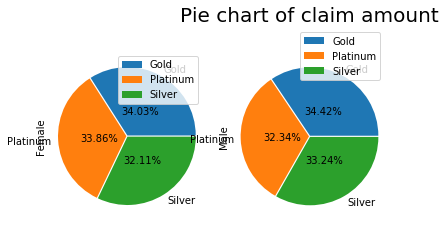

In [36]:
claim.plot(kind = 'pie', autopct='%.2f%%', pctdistance = 0.4, fontsize=10, explode = (0.01,0.01,0.01), subplots=True)
plt.title('Pie chart of claim amount', fontsize=20)
plt.axis('equal')
plt.show()

### Q12. Among males and females, which gender had claimed the most for any type of driver related issues? Eg - This metric can be compared using a bar chart

In [37]:
driver_issue = Final_data.loc[Final_data['incident_cause'].isin(['Driver error', 'Other driver error'])]
gender_group = round(driver_issue.groupby('gender')['claim_amount'].sum(),2)
gender_group

gender
Female    3136717.95
Male      3975411.85
Name: claim_amount, dtype: float64

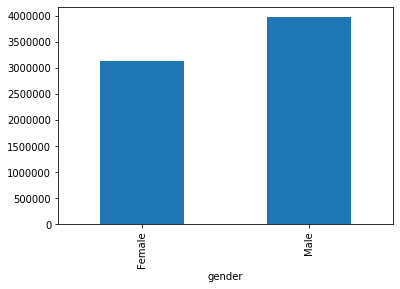

In [38]:
gender_group.plot(kind='bar')

##### The 'Males' have claimed more as compared to 'Females' for driver related issues.

### Q13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [39]:
fraud = Final_data.loc[Final_data['fraudulent'] == 'Yes']
max_fraud_group = fraud.groupby('Age_Group')['total_policy_claims'].sum()
max_fraud_group

Age_Group
Adult    289.0
Youth    136.0
Name: total_policy_claims, dtype: float64

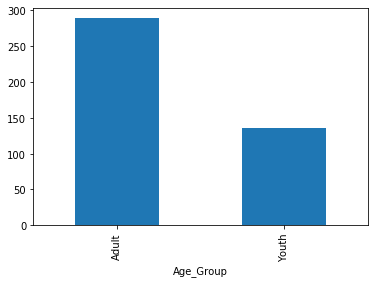

In [40]:
max_fraud_group.plot(kind='bar')

##### Adults have the maximum fraudulent policy claims.

### Q14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the "month" axis, the month is in a chronological order not alphabetical order.

In [41]:
Final_data['claim_month'] = Final_data.claim_date.apply(lambda x:x.month)

In [42]:
Final_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Alert_flag,Age,Age_Group,claim_month
177,74155265,Male,1985-11-16,TX,392-739-4873,Gold,25647821,74155265,Natural causes,2017-01-01,Auto,No,Material only,2080.0,1.0,No,0,32,Adult,1
181,61745840,Female,1994-07-24,MA,612-684-5472,Platinum,90591192,61745840,Other driver error,2017-01-01,Home,No,Material and injury,30930.0,1.0,No,0,23,Youth,1
312,65176092,Male,1975-11-23,NC,651-379-2486,Silver,9476314,65176092,Other causes,2017-01-01,Auto,No,Material and injury,37290.0,3.0,No,0,42,Adult,1
905,42664554,Female,1993-08-13,TN,396-973-2531,Gold,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,0,24,Youth,1
120,39587790,Male,2065-01-10,LA,615-154-3516,Gold,39131766,39587790,Other causes,2017-01-01,Auto,No,Material only,2967.0,1.0,Yes,0,52,Adult,1


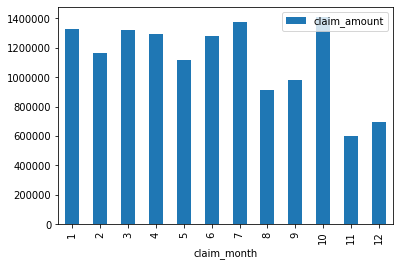

In [43]:
pd.pivot_table(data = Final_data, index = 'claim_month',
               values='claim_amount', aggfunc='sum').plot(kind='bar')

### Q15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one fraudulent claims and the other for non-fraudulent claims.

In [44]:
avg = pd.pivot_table(data = Final_data, index = 'Age_Group', columns=['gender','fraudulent'], 
               values='claim_amount', aggfunc='mean')
avg

gender            Female                        Male              
fraudulent            No           Yes            No           Yes
Age_Group                                                         
Adult       12348.199900  12566.352352  12306.232010  16804.645198
Youth       12523.707709   7602.594617  12396.894008  10686.017886

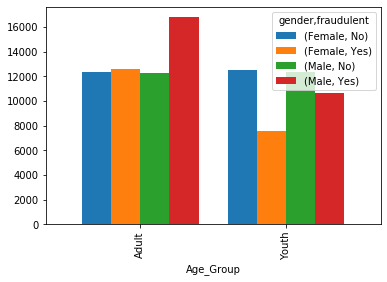

In [45]:
avg.plot(kind='bar',stacked=False, width=0.8)

### Q16. Is there any similarity in the amount claimed by males and females?

In [50]:
import scipy.stats as stats

In [52]:
# Independent Sample T-test 
male_claim_amt = Final_data.loc[Final_data['gender']=='Male']['claim_amount']
female_claim_amt = Final_data.loc[Final_data['gender']=='Female']['claim_amount']

In [53]:
print('s1:', male_claim_amt.mean(), '| s2:', female_claim_amt.mean())

s1: 12884.845110657638 | s2: 12101.160474551885


In [ ]:
H0: Amount claimed by males is similar to the amount claimed by females
Ha: Amount claimed by males is different to the amount claimed by females
CI: 95%
p: 0.05

In [60]:
stats.ttest_ind( male_claim_amt, female_claim_amt )

Ttest_indResult(statistic=0.962509344663214, pvalue=0.33601006135365363)

##### Since the p-value is greater than 0.05, so we fail to reject the NULL hupothesis. So, we can conclude that there is a similarity between the amount claimed by males and females.

### Q17. Is there any relationship between the age category and segment?

H0: No relation between age category and segment
Ha: There is a relation between age category and segment
CI: 95%
p: 0.05

In [63]:
# Chi-square test
obs = pd.crosstab(Final_data.Age_Group, Final_data.Segment, margins=True)
obs

Segment,Gold,Platinum,Silver,All
Age_Group,,,,
Adult,267,244,245,756
Youth,104,117,101,322
All,371,361,346,1078


In [64]:
stats.chi2_contingency(obs)

(1.7860858620566749,
 0.9382837422697496,
 6,
 array([[ 260.18181818,  253.16883117,  242.64935065,  756.        ],
        [ 110.81818182,  107.83116883,  103.35064935,  322.        ],
        [ 371.        ,  361.        ,  346.        , 1078.        ]]))

##### Since, the p-value is greater than 0.05, so we fail to reject the NULL hypothesis. We can conclude that there is no relation between age category and segment.

### Q18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000

In [71]:
# 1-sample T-test
avg_claim_amount_2018 = Final_data.loc[Final_data.claim_date >= '2018-01-01']['claim_amount']
avg_claim_amount_2018.mean()

12743.43753167584

In [ ]:
H0: u1 <= 10000 #The average claim amount is same of 2018 and 2016-17
Ha: u1 > 10000 #The average claim amount is increased in 2018 than that of 2016-17
CI: 99%
p: 0.01

In [72]:
stats.ttest_1samp( avg_claim_amount_2018, 10000 )

Ttest_1sampResult(statistic=4.477343563243787, pvalue=9.43584422198333e-06)

##### Since, the p-value is very less, so we will reject the NULL hypothesis. We can safely conclude that the current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average. We can make this claim with more than 99% CI.

### Q19. Is there any difference between age groups and insurance claims?

In [74]:
# ANOVA Test
age_grp_1 = Final_data.loc[Final_data.Age_Group == 'Youth']['total_policy_claims']
age_grp_2 = Final_data.loc[Final_data.Age_Group == 'Adult']['total_policy_claims']

In [ ]:
H0: No difference or influence of age groups on insurance claims
Ha: There is a difference or influence of age groups on insurance claims
CI: 95%
p: 0.05

In [75]:
stats.f_oneway(age_grp_1, age_grp_2)

F_onewayResult(statistic=0.41721257474010137, pvalue=0.5184689273312751)

##### Since, the p value is greater than 0.05, we fail to reject the NULL hypothesis. We can conclude that there is no influence of age groups on insurance claims.

### Q20. Is there any relationship between total number of policy claims and the claimed amount?

In [76]:
# Co-relation test
Final_data.total_policy_claims.corr(other=Final_data.claim_amount)

-0.02240156677762885

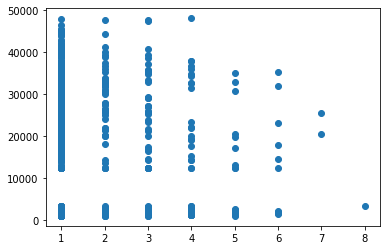

In [78]:
plt.scatter(Final_data.total_policy_claims, Final_data.claim_amount)

##### There is a relationship between total policy claims and claimed amount.